In [4]:
import cv2
import imutils
import matplotlib.pyplot as plt
import numpy as np

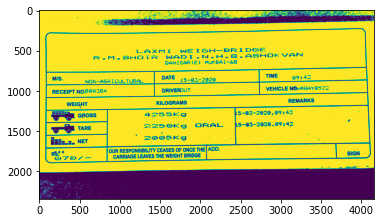

In [5]:
img = cv2.imread("../sample_binary.jpg", 0)
plt.imshow(img)

In [6]:
img.shape

(2340, 4160)

In [7]:
# Length(width) of kernel as 100th of total width
kernel_len = np.array(img).shape[1]//100
# Defining a vertical kernel to detect all vertical lines of image 
ver_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, kernel_len))
# Defining a horizontal kernel to detect all horizontal lines of image
hor_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_len, 1))
# A kernel of 2x2
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))

In [8]:
img_inv = 255-img

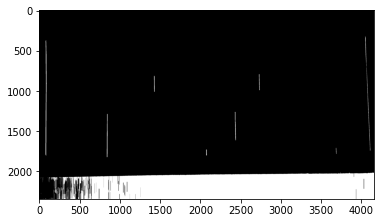

In [9]:
#Use vertical kernel to detect and save the vertical lines in a jpg
image_1 = cv2.erode(img_inv, ver_kernel, iterations=3)
vertical_lines = cv2.dilate(image_1, ver_kernel, iterations=3)
#Plot the generated image
plotting = plt.imshow(image_1,cmap='gray')
plt.show()

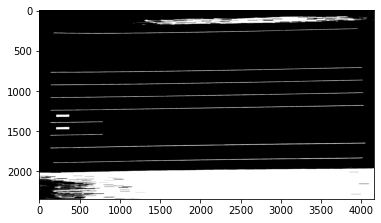

In [10]:
#Use horizontal kernel to detect and save the horizontal lines in a jpg
image_2 = cv2.erode(img_inv, hor_kernel, iterations=3)
horizontal_lines = cv2.dilate(image_2, hor_kernel, iterations=3)
#Plot the generated image
plotting = plt.imshow(image_2,cmap='gray')
plt.show()

In [11]:
# Combine horizontal and vertical lines in a new third image, with both having same weight.
img_vh = cv2.addWeighted(vertical_lines, 0.5, horizontal_lines, 0.5, 0.0)
#Eroding and thesholding the image
img_vh = cv2.erode(~img_vh, kernel, iterations=2)
thresh, img_vh = cv2.threshold(img_vh,128,255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
cv2.imwrite('../table.jpg', img_vh)

True

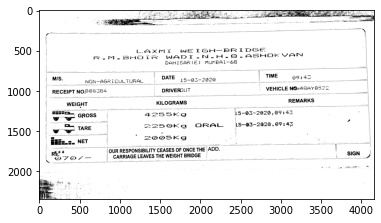

In [12]:
bitxor = cv2.bitwise_xor(img,img_vh)
bitnot = cv2.bitwise_not(bitxor)
#Plotting the generated image
plotting = plt.imshow(bitnot,cmap='gray')
plt.show()

In [13]:
# Detect contours for following box detection
contours, hierarchy = cv2.findContours(img_vh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

def sort_contours(cnts, method="left-to-right"):
    # initialize the reverse flag and sort index
    reverse = False
    i = 0
    # handle if we need to sort in reverse
    if method == "right-to-left" or method == "bottom-to-top":
        reverse = True
    # handle if we are sorting against the y-coordinate rather than
    # the x-coordinate of the bounding box
    if method == "top-to-bottom" or method == "bottom-to-top":
        i = 1
    # construct the list of bounding boxes and sort them from top to
    # bottom
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes), key=lambda b:b[1][i], reverse=reverse))

    # return the list of sorted contours and bounding boxes
    return (cnts, boundingBoxes)

# Sort all the contours by top to bottom.
contours, boundingBoxes = sort_contours(contours, method="top-to-bottom")
#Creating a list of heights for all detected boxes
heights = [boundingBoxes[i][3] for i in range(len(boundingBoxes))]
#Get mean of heights
mean = np.mean(heights)

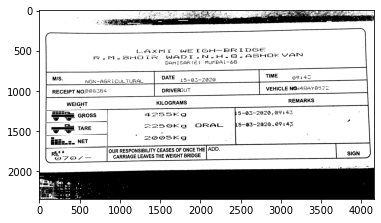

In [14]:
#Create list box to store all boxes in  
box = []
# Get position (x,y), width and height for every contour and show the contour on image
for c in contours:
    x, y, w, h = cv2.boundingRect(c)
    if (w<1000 and h<500):
        image = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),3)
        box.append([x,y,w,h])
cv2.imwrite("test.jpg", image)
plotting = plt.imshow(image,cmap="gray")
plt.show()

In [15]:
#Creating two lists to define row and column in which cell is located
row=[]
column=[]
j=0
#Sorting the boxes to their respective row and column
for i in range(len(box)):
    if(i==0):
        column.append(box[i])
        previous=box[i]
    else:
        if(box[i][1]<=previous[1]+mean/2):
            column.append(box[i])
            previous=box[i]
            if(i==len(box)-1):
                row.append(column)
        else:
            row.append(column)
            column=[]
            previous = box[i]
            column.append(box[i])
print(column)
print(row)

[[0, 2238, 25, 102], [652, 2240, 1, 1], [463, 2244, 6, 1], [370, 2244, 8, 1], [356, 2244, 2, 1], [350, 2244, 1, 1], [339, 2244, 3, 1], [329, 2244, 5, 1], [288, 2244, 2, 1], [277, 2244, 1, 1], [490, 2256, 2, 1], [194, 2257, 4, 2], [177, 2257, 2, 2], [177, 2262, 2, 3], [615, 2269, 1, 1], [194, 2271, 8, 2], [177, 2271, 1, 2], [168, 2271, 6, 2], [237, 2272, 1, 1], [233, 2272, 1, 2], [467, 2273, 6, 6], [746, 2274, 2, 3], [88, 2276, 38, 46], [463, 2277, 2, 2], [129, 2277, 19, 7], [383, 2278, 2, 4], [370, 2280, 8, 8], [350, 2280, 1, 3], [339, 2280, 3, 3], [332, 2280, 2, 3], [350, 2287, 1, 1], [339, 2287, 3, 1], [332, 2287, 2, 1], [305, 2287, 1, 1], [277, 2287, 1, 4], [266, 2287, 2, 4], [217, 2287, 2, 2], [194, 2287, 8, 2], [177, 2287, 1, 2], [168, 2287, 6, 2], [152, 2287, 8, 2], [129, 2287, 19, 2], [553, 2288, 2, 1], [129, 2292, 7, 1], [350, 2295, 1, 4], [339, 2295, 3, 7], [332, 2295, 2, 3], [305, 2295, 1, 3], [282, 2296, 2, 2], [277, 2296, 2, 2], [266, 2296, 2, 2], [235, 2296, 1, 2], [227, 2

In [20]:
#calculating maximum number of cells
countcol = 0
for i in range(len(row)):
    countcol = len(row[i])
    if countcol > countcol:
        countcol = countcol

In [21]:
#Retrieving the center of each column
center = [int(row[i][j][0]+row[i][j][2]/2) for j in range(len(row[i])) if row[0]]
center=np.array(center)
center.sort()

In [22]:
finalboxes = []
for i in range(len(row)):
    lis=[]
    for k in range(countcol):
        lis.append([])
    for j in range(len(row[i])):
        diff = abs(center-(row[i][j][0]+row[i][j][2]/4))
        minimum = min(diff)
        indexing = list(diff).index(minimum)
        lis[indexing].append(row[i][j])
    finalboxes.append(lis)

In [19]:
#from every single image-based cell/box the strings are extracted via pytesseract and stored in a list
outer=[]
for i in range(len(finalboxes)):
    for j in range(len(finalboxes[i])):
        inner=""
        if(len(finalboxes[i][j])==0):
            outer.append(' ')
        else:
            for k in range(len(finalboxes[i][j])):
                y,x,w,h = finalboxes[i][j][k][0],finalboxes[i][j][k][1], finalboxes[i][j][k][2],finalboxes[i][j][k][3]
                finalimg = bitnot[x:x+h, y:y+w]
                kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 1))
                border = cv2.copyMakeBorder(finalimg,2,2,2,2,   cv2.BORDER_CONSTANT,value=[255,255])
                resizing = cv2.resize(border, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
                dilation = cv2.dilate(resizing, kernel,iterations=1)
                erosion = cv2.erode(dilation, kernel,iterations=1)

                
                out = pytesseract.image_to_string(erosion)
                if(len(out)==0):
                    out = pytesseract.image_to_string(erosion, config='--psm 3')
                inner = inner +" "+ out
            outer.append(inner)

NameError: name 'pytesseract' is not defined